In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch

from keraTorch.model import Sequential
from keraTorch.layers import Conv2D, MaxPool2D, Flatten, Dense
from keraTorch.losses import ce4softmax, ce_loss

%matplotlib inline

In [ ]:
from keras.datasets import cifar10 as dataset
# load dataset
(trainX, trainy), (testX, testy) = dataset.load_data()
trainy = trainy.ravel()
testy = testy.ravel()
print(trainX.shape, testX.shape, trainy.shape, testy.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


In [ ]:
labels = dict(zip(range(10), 
                  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
))
labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

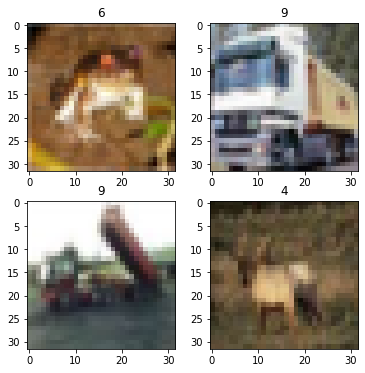

In [ ]:
plt.figure(figsize=(6,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(trainX[i])
    plt.title(trainy[i])
plt.show()

In [ ]:
trainX = trainX.transpose(0, 3, 1, 2) # [...,None]
testX = testX.transpose(0, 3, 1, 2) # [...,None]
print(trainX.shape, testX.shape, trainy.shape, testy.shape)

(50000, 3, 32, 32) (10000, 3, 32, 32) (50000,) (10000,)


In [ ]:
model = Sequential()
model.add(Conv2D(8, input_shape=trainX.shape[1:], activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(16, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(32, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10))
model.compile(ce_loss)

In [ ]:
model.model

Sequential(
  (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten()
  (10): Linear(in_features=512, out_features=10, bias=True)
)

## How size of image changes through structure

In [ ]:
img = torch.zeros((1,) + trainX.shape[1:])

In [ ]:
for i in range(len(model.model)):
    print(model.model[:i](img).shape)

torch.Size([1, 3, 32, 32])
torch.Size([1, 8, 32, 32])
torch.Size([1, 8, 32, 32])
torch.Size([1, 8, 16, 16])
torch.Size([1, 16, 16, 16])
torch.Size([1, 16, 16, 16])
torch.Size([1, 16, 8, 8])
torch.Size([1, 32, 8, 8])
torch.Size([1, 32, 8, 8])
torch.Size([1, 32, 4, 4])
torch.Size([1, 512])


In [ ]:
model.model[:3](img).shape

torch.Size([1, 8, 16, 16])

In [ ]:
model.model(img).shape

torch.Size([1, 10])

## Train Model

Min numerical gradient: 1.58E-02
Min loss divided by 10: 3.31E-01


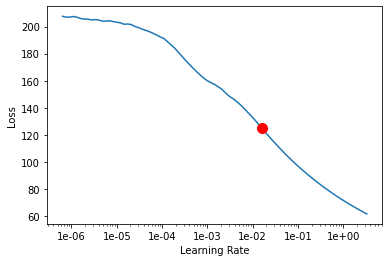

In [ ]:
bs = 256
model.lr_find(trainX, trainy.ravel(), bs)

In [ ]:
epochs = 20
model.fit(trainX, trainy.ravel(), bs, epochs, lr=1e-2)

epoch,train_loss,valid_loss,time
0,13.955879,7.186002,00:12
1,3.558132,2.378814,00:12
2,1.977317,1.862033,00:12
3,1.678313,1.885625,00:12
4,1.591788,1.607323,00:12
5,1.572231,1.521927,00:12
6,1.459763,1.494764,00:13
7,1.428111,1.682094,00:12
8,1.484869,1.482868,00:13
9,1.371482,1.386894,00:14


## Testing

In [ ]:
preds = model.predict(testX)
print(testX.shape, preds.shape)

(10000, 3, 32, 32) (10000, 10)


In [ ]:
y_preds = preds.argmax(axis=1)
accuracy = (testy == y_preds).mean()
print(f'Accuracy is {accuracy:.2f}')

Accuracy is 0.60
